In [13]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone
import pytz
from data_preparation import *
import matplotlib.pyplot as plt

In [14]:
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

In [15]:
tz = pytz.timezone('US/Pacific')
now = datetime.now()

def genSignal(dft, df):
    buy = [np.nan] * len(df)
    sell = [np.nan] * len(df)
    for i in range(len(dft)):
        tt = datetime.strptime(dft.iloc[i]['Time'], "%Y-%m-%d %H:%M:%S.%f")
        if (now - tt).days > 20:
            continue
        tt = tz.localize(tt, is_dst=True)
        tt = tt.astimezone(pytz.timezone('America/New_York'))

        idx = df.index[df['Time'] == nearest(df['Time'], tt)][0]
        if dft.iloc[i]['Action'] == "buy":
            buy[idx] = float(dft.iloc[i]['Price'])
        else:
            sell[idx] = float(dft.iloc[i]['Price'])
            
    return (buy, sell)




In [22]:
data = pd.read_csv('logs/sim/history.csv', header=None, names=['Time', 'Action', 'Amount', 'Ticker', 'Price'])

In [23]:
tickers = list(set(data['Ticker']))

#tickers = ['INTC', 'GS']

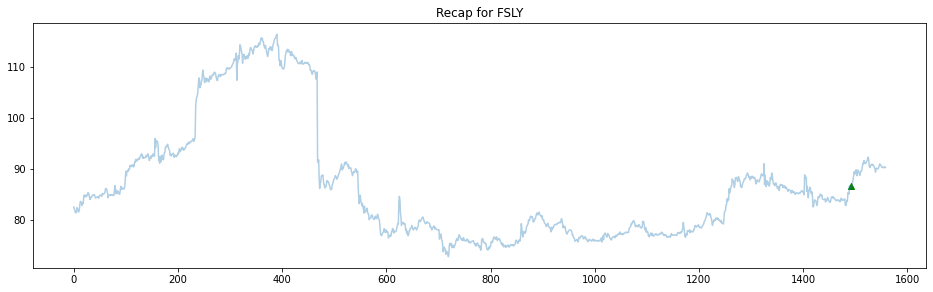

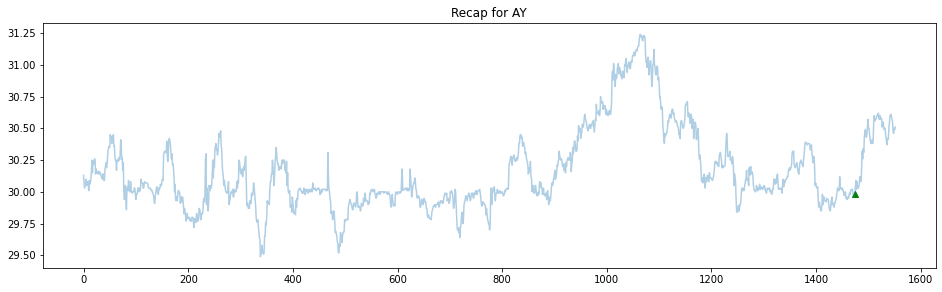

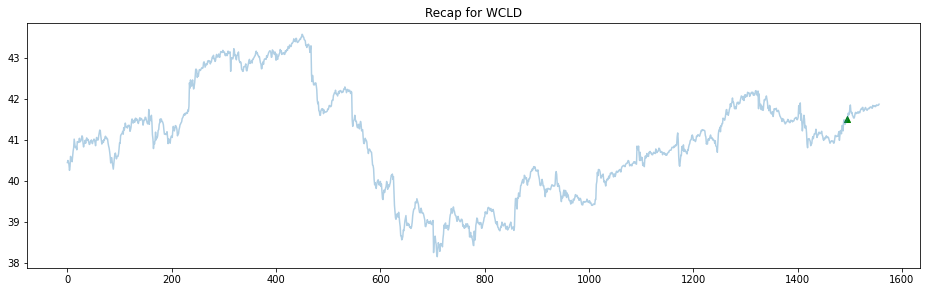

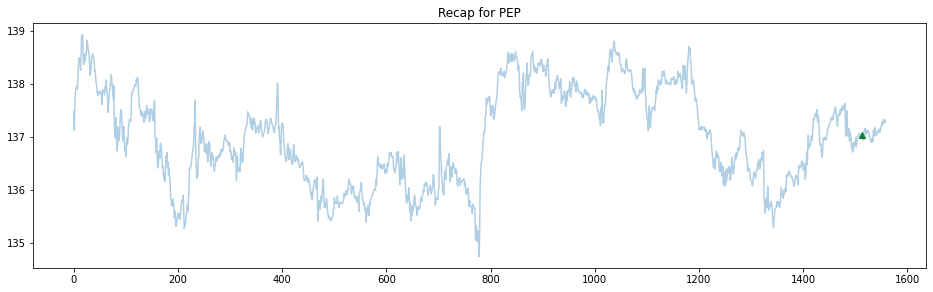

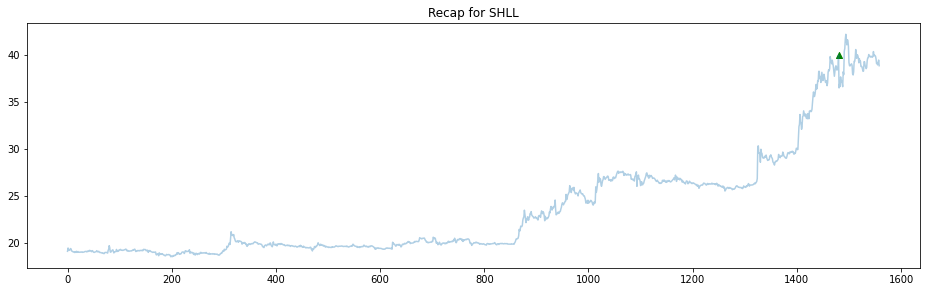

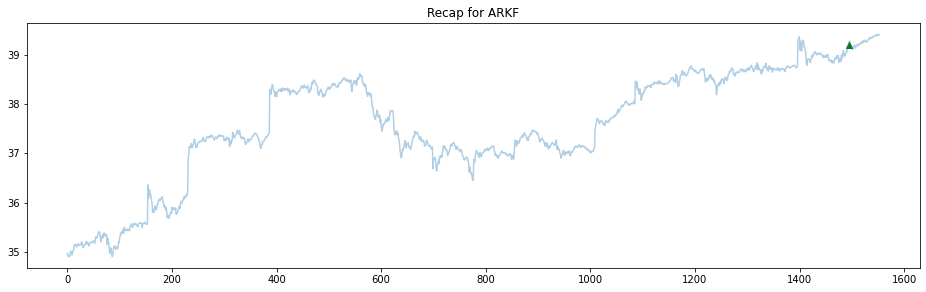

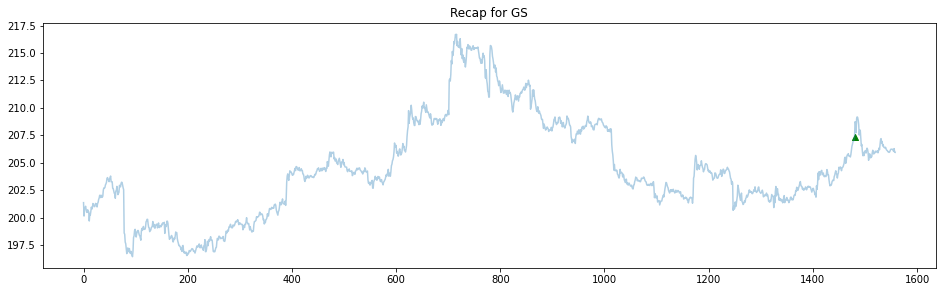

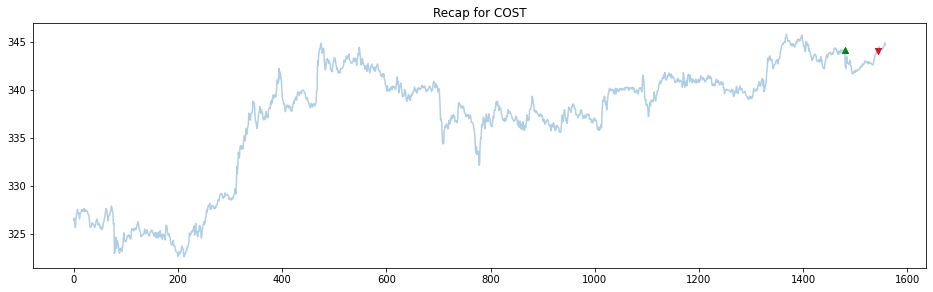

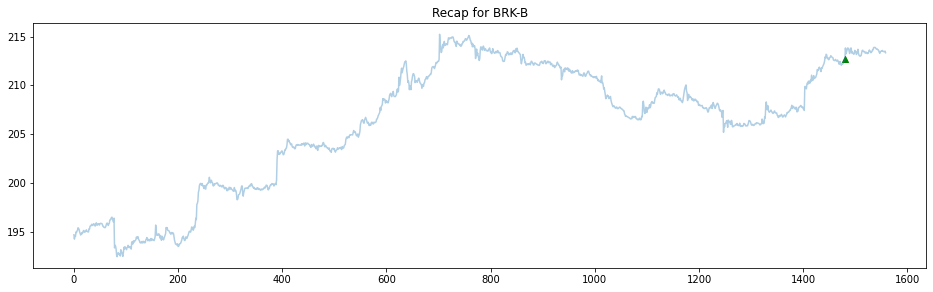

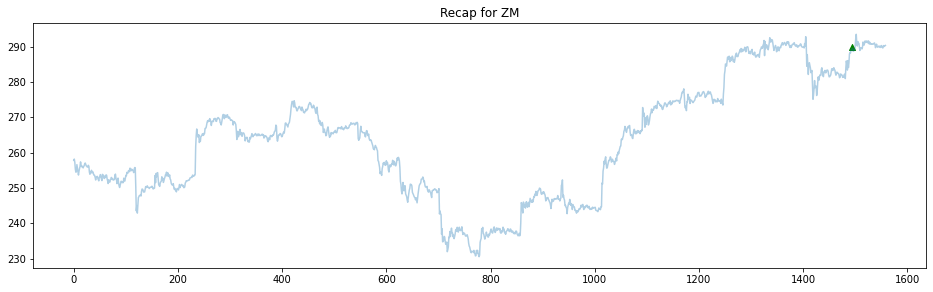

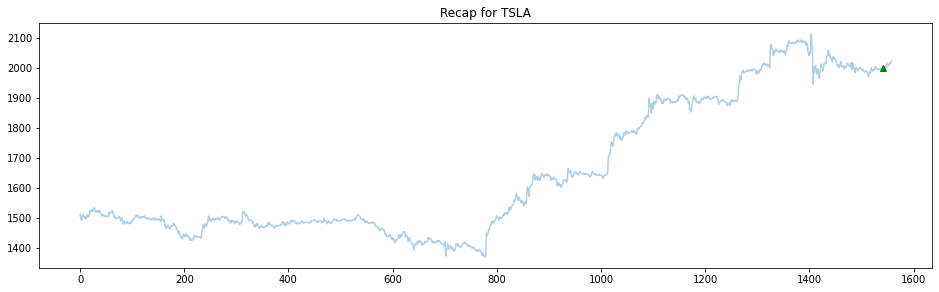

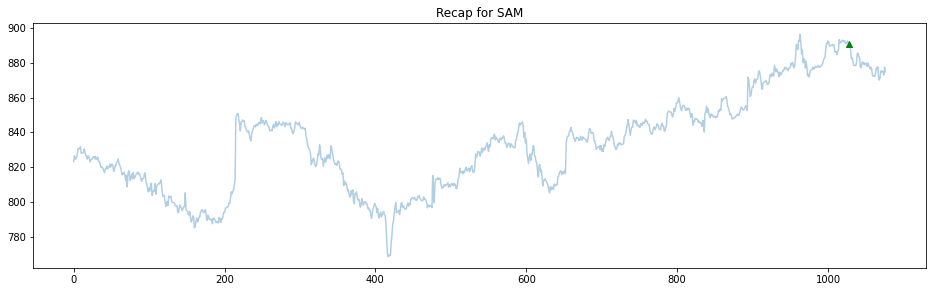

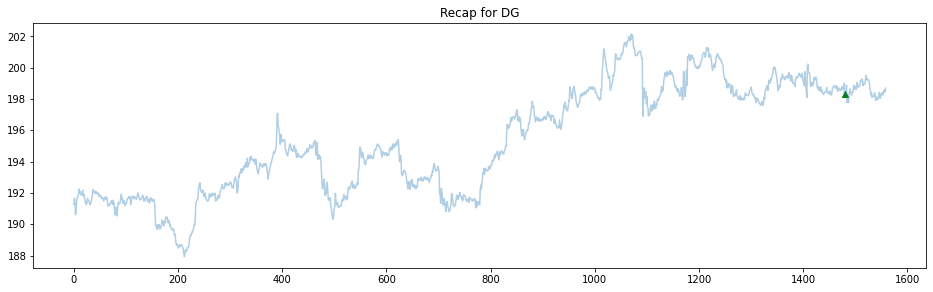

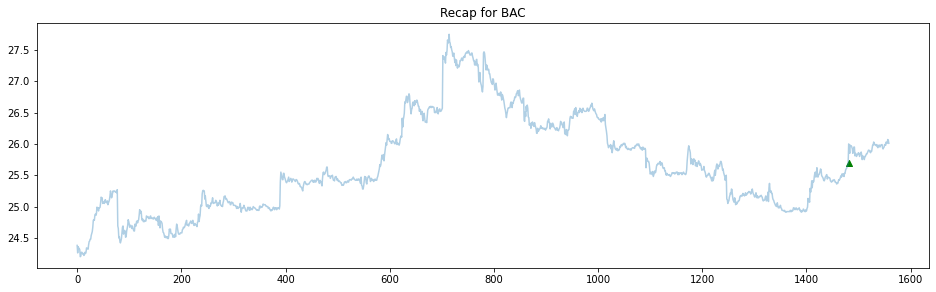

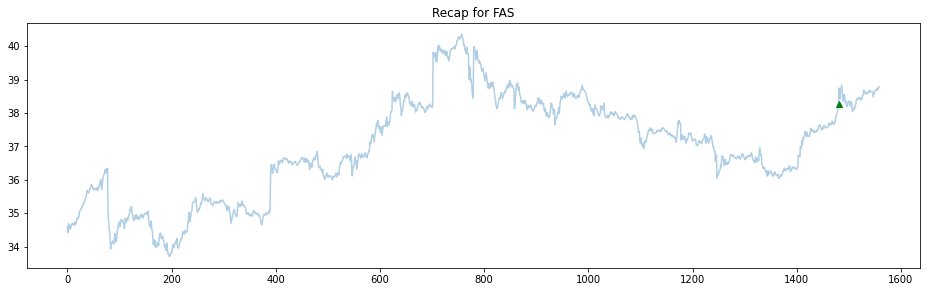

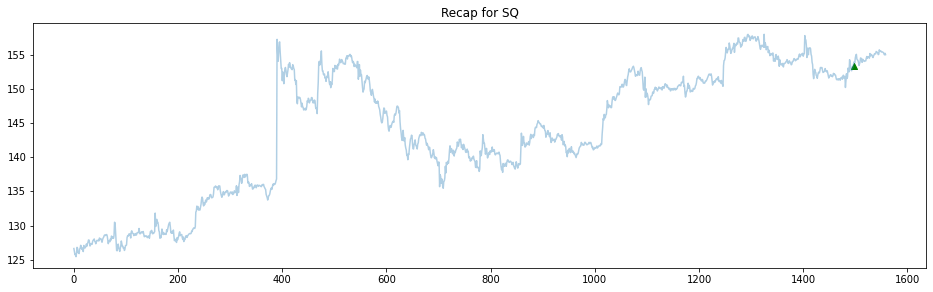

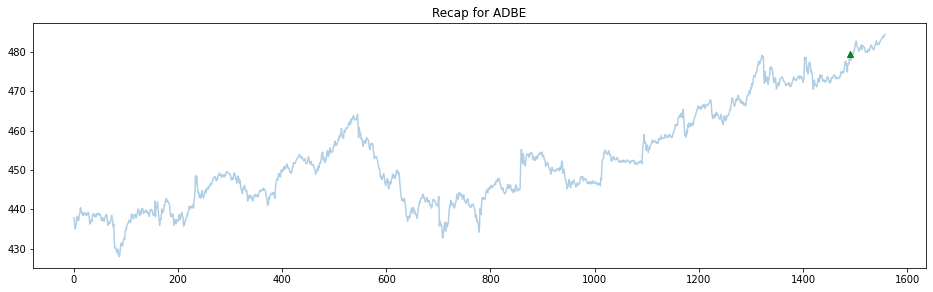

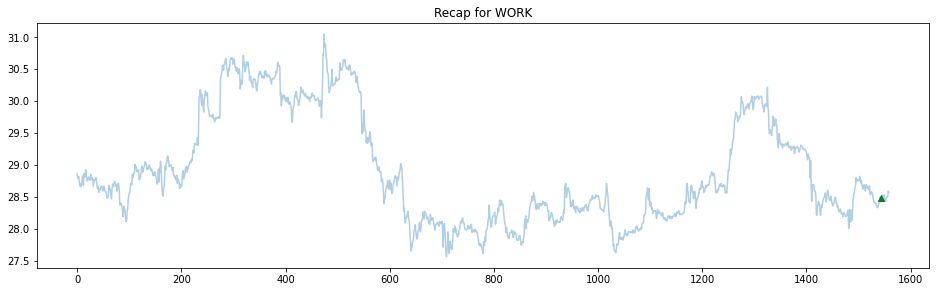

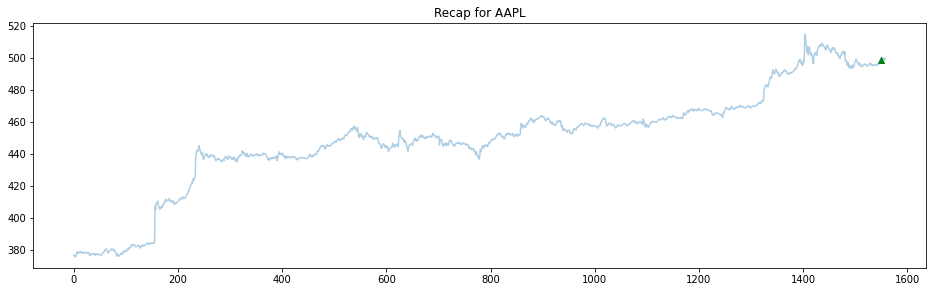

In [24]:
for ticker in tickers:
    dft = data[data['Ticker'] == ticker]
    df, _ = refresh(ticker, period= "20d", interval = "5m")
    buy, sell = genSignal(dft, df)
    
    plt.figure(figsize=(16, 4.5))
    plt.plot(df["close"], label="close", alpha=0.35)
    plt.scatter(df.index, buy, color="green", label="buy", marker="^", alpha=1)
    plt.scatter(df.index, sell, color="red", label="sell", marker="v", alpha=1)
    plt.title(f'Recap for {ticker}')
    plt.show()